# CONTENT
> 
<font color = 'red'>
    
1. [Load and Check Data](#1)
2. [Variable Description](#2)
    *    [Univariate Variable Analysis](#3) 
            * [Categorical Variable](#4) 
            * [Numerical Variable](#5) 
3. [Basic Data Analysis](#6)
4. [Outlier Detection](#7)
5. [Missing Value](#8)
    * [Find Missing Value](#9)
    * [Fill Missing Value](#10)
6. [Visualization](#11)
    * [Correlation Between Sibsp & Parch & Age & Fare & Survived](#12)
    * [Sibsp & Survived](#13)
    * [Pclass & Survived](#14)
    * [Age & Survived](#15)
    * [Survived & Age & Pclass](#16)
    * [Embarked & Sex & Pclass & Survived](#17)
    * [Embarked & Sex & Fare & Survived](#18)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')  # with --> plt.style.available  --> you can see all available functions

import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

from collections import Counter


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

C:\Users\Admin\AppData\Local\Temp\ipykernel_15388\3848951453.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')  # with --> plt.style.available  --> you can see all available functions


<a id = "1"></a><br>
# Load and Check Data

In [2]:
df = pd.read_csv("titanic_data.csv")

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id = "2"></a><br>
# Variable Description
1. PassengerId : unique id number to each passenger
1. Survived : passenger survive(1) died(0)
1. Pclass : passenger class
1. Name : name
1. Sex : gender of passenger
1. Age : age of passenger
1. SibSp : number of siblings/spouses 
1. Parch : number of parents/children
1. Ticket : ticket number
1. Fare : amount of money spent on ticket
1. Cabin : cabin category
1. Embarked : port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 <a id = "3"></a><br>
 # Univariate Variable Analysis
    * Categorical Variable : Survived, Sex, PClass, Embarked, Cabin, Name, Ticket, Sibsp and Parch
    * Numerical Variable : Fare, age and passengerId

<a id = "4"></a><br>
## Categorical Variable


In [7]:
def bar_plot(variable):
    """
        Input : variable ex : "Survived"
        Output : bar plot & value count
    """
    
    #get feature
    var = df[variable]
    
    #count number of categorical variable(value/sample)
    value_count = var.value_counts()
    
    #visualize 
    plt.figure(figsize = (9,3))
    plt.bar(value_count.index,value_count)
    plt.xticks(value_count.index, value_count.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,value_count))
    

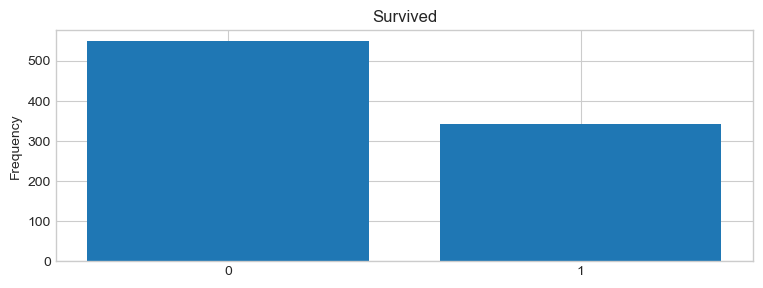

Survived: 
 Survived
0    549
1    342
Name: count, dtype: int64


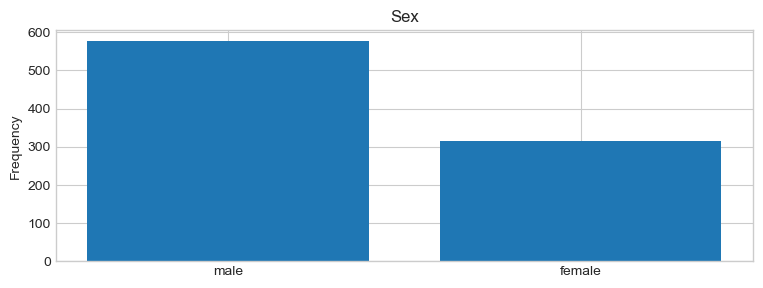

Sex: 
 Sex
male      577
female    314
Name: count, dtype: int64


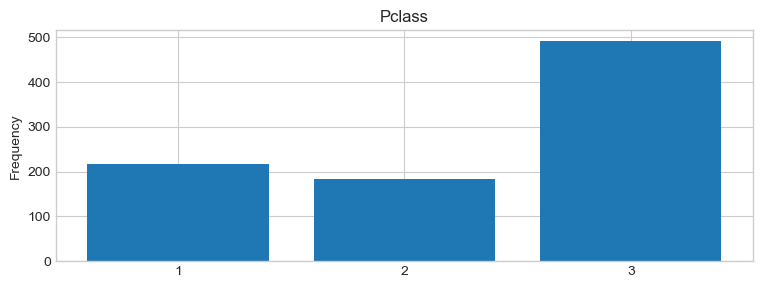

Pclass: 
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64


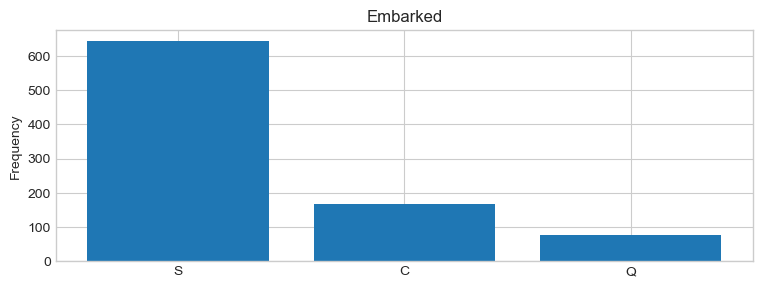

Embarked: 
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


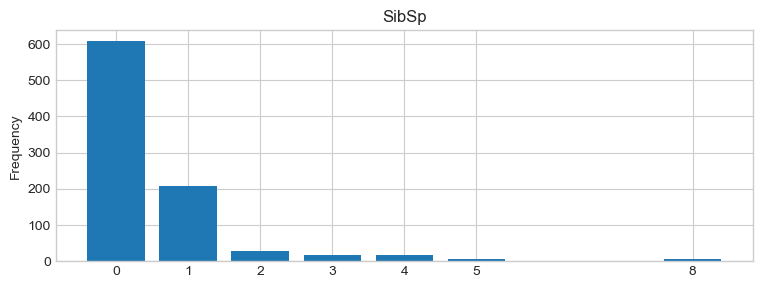

SibSp: 
 SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


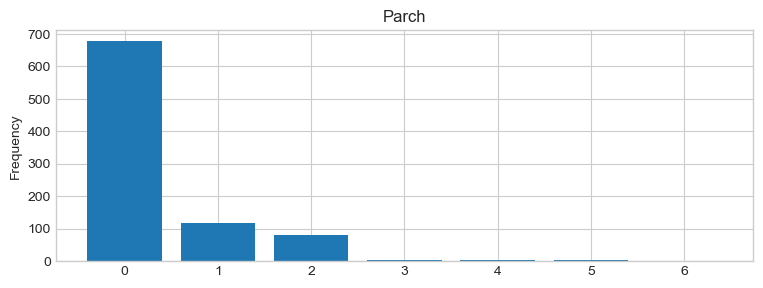

Parch: 
 Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [8]:
category1 = ["Survived","Sex","Pclass","Embarked","SibSp","Parch"]

for c in category1:
    bar_plot(c)



In [9]:
category2 = ["Cabin","Name","Ticket"]

for c in category2:
    print("{} \n ".format(df[c].value_counts()))

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64 
 
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64 
 
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64 
 


<a id = "5"></a><br>
## Numerical Variable

In [10]:
def hist_plot(variable):
    plt.figure(figsize = (9,3))
    plt.hist(df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

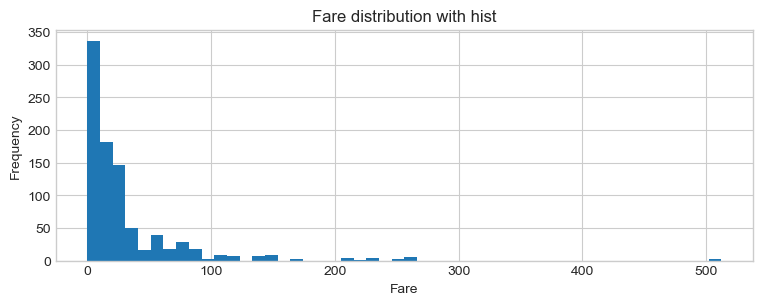

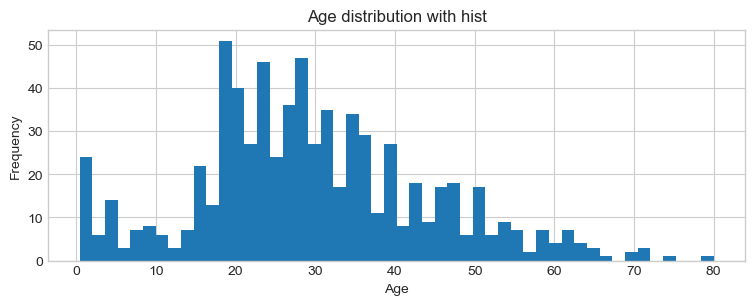

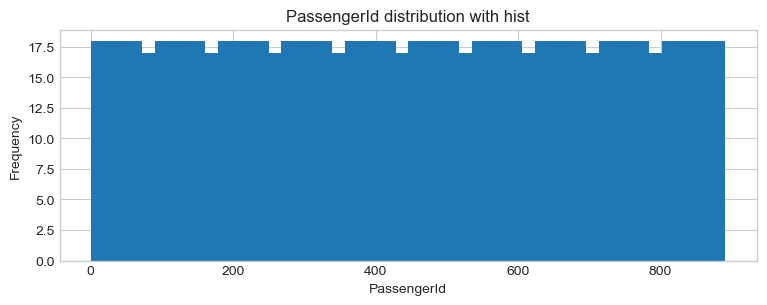

In [11]:
numericVar = ["Fare","Age","PassengerId"]

for c in numericVar:
    hist_plot(c)


<a id = "6" ></a><br>
# Basic Data Analysis
* Pclass - Survived
* Sex - Survived
* SibSp - Survived
* Parch - Survived

In [12]:
# Plcass vs Survived
df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [13]:
# Sex vs Survived
df[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [14]:
# Sibsp vs Survived
df[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [15]:
# Parch vs Survived
df[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<a id = "7"></a><br>
# Outlier Detection

In [16]:
def detect_outliers(dataFrame,features):
    outlier_indices = []
    
    for i in features:
        # 1st quartile
        Q1 = np.percentile(dataFrame[i],25)
        # 3rd quartile
        Q3 = np.percentile(dataFrame[i],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_index = dataFrame[(dataFrame[i] < Q1 - outlier_step) | (dataFrame[i] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_index)
    
    outlier_indices = Counter(outlier_indices)
    #print(outlier_indices)
    #print(outlier_indices.items())
    
    multiple_outliers = list(index for index,value_count in outlier_indices.items() if  value_count > 2)
    #print(multiple_outliers)
    
    return multiple_outliers  #return indexes

In [17]:
df.loc[detect_outliers(df,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [18]:
# drop outliers
df = df.drop(detect_outliers(df,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop = True)

In [19]:
df.info() # deleted 10 passengers (891-->881 passengers)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  881 non-null    int64  
 1   Survived     881 non-null    int64  
 2   Pclass       881 non-null    int64  
 3   Name         881 non-null    object 
 4   Sex          881 non-null    object 
 5   Age          711 non-null    float64
 6   SibSp        881 non-null    int64  
 7   Parch        881 non-null    int64  
 8   Ticket       881 non-null    object 
 9   Fare         881 non-null    float64
 10  Cabin        201 non-null    object 
 11  Embarked     879 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB


<a id = "8"></a><br>
# Missing Value
> * Find Missing Value
* Fill Missing Value

In [23]:
train_df = pd.read_csv("titanic_data.csv")

In [25]:
train_df_len = len(train_df)
train_df = pd.concat([train_df],axis = 0).reset_index(drop = True)


In [26]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id = "9"></a><br>
## Find Missing Value

In [27]:
train_df.columns[train_df.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [28]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<a id = "10"></a><br>
## Fill Missing Value
* Embarked has 4 missing value
* Age has 354 missing value

In [29]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


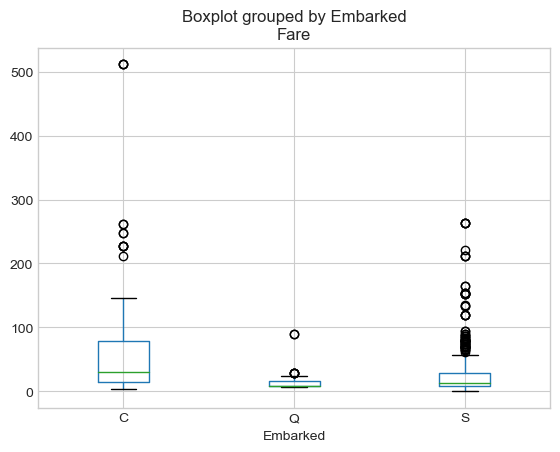

In [30]:
train_df.boxplot(column="Fare",by = "Embarked")
plt.show()

In [31]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")

In [32]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [33]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [34]:
np.mean(train_df[train_df["Age"].notnull()]["Age"])

29.69911764705882

In [35]:
train_df["Age"] = train_df["Age"].fillna(np.mean(train_df[train_df["Age"].notnull()]["Age"]))

In [36]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a id = "11"></a><br>
# Visualization

<a id = "12"></a><br>
## Correlation Between Sibsp & Parch & Age & Fare & Survived
    
    As you can see most correlated features are SibSp & Parch (0.41)
    But for survived feature most correlated with Fare (0.26)

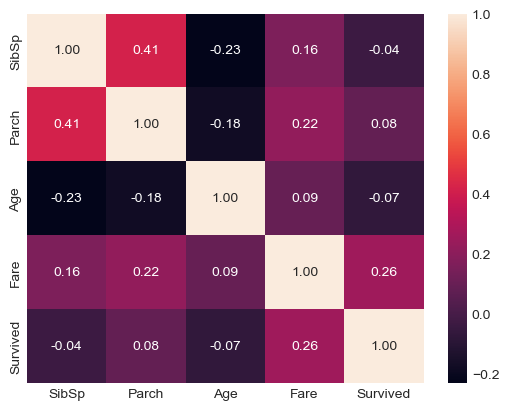

In [37]:
list_1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(train_df[list_1].corr(), annot = True, fmt = ".2f")
plt.show()

<a id = "15"></a><br>
## Age & Survived

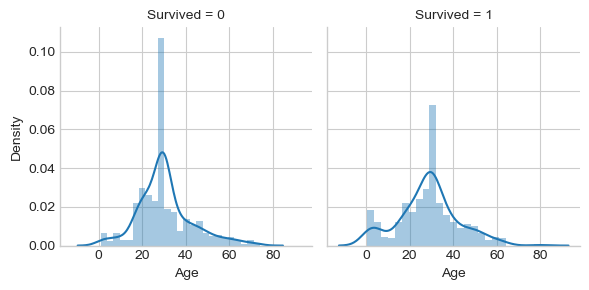

In [41]:
g = sns.FacetGrid(train_df, col = "Survived")
g.map(sns.distplot, "Age", bins = 25)
plt.show()